In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Overview

For this Projects I used exploritory data analysis to generate insights for the bussiness stakeholders 

# Bussiness Problem

Mircosoft wants to enter into the film industry to create original conetent but they dont know any data driven way to create a viable plan to achieve box office succes. 

# Data

the data that was derived to create these insights are from IMDB, Box Office Mojo and TheMovieDB, as well as data from the Numbers website(A24 Data that was collected using an API platform).

# The Methods

This project uses exploratory data analysis tools such as deriving data using an api, data cleaning large sets of csv files after converting them into dataframes and uses matplotblyb and seaborn to visualize any patterns/findings that were made.

# Data Understanding

By using mutlple datasets where budgets, box office gross numbers are displayed, profit margins can be derived and show how absorbing a studio as the main branch of exporting movies is the ideal approach to the issue of entering a new industry. The data files and types can be broken down to compare visualy compare the findings and show how aquiring A24 is a viable option.



In [48]:
#this dataframe was used to get most liked genres in IMDB to get the highest rated genre  
df= pd.read_csv(r'/Users/jonathanflores/Documents/Flatiron/Gitted_project/zippedData/tmdb.movies.csv')
df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [49]:
#a dictionary was created from the website 
genre_dict = \
{'Action'        :  28,
'Adventure'     :  12 ,
'Animation'     :  16,
'Comedy'         : 35,
'Crime'          : 80,
'Documentary'    : 99,
'Drama'          : 18,
'Family'         : 10751,
'Fantasy'        : 14,
'History'        : 36,
'Horror'         : 27,
'Music'          : 10402,
'Mystery'        : 9648,
'Romance'        : 10749,
'Science Fiction' : 878,
'TV Movie'      : 10770,
'Thriller'       : 53,
'War'            : 10752,
'Western'        : 37}

In [50]:
genre_dict = {v:k for k,v in genre_dict.items()}

In [51]:
genre_dict

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [52]:
df['genre_ids'] =df['genre_ids'].apply(lambda x: x.replace('[', ''))
df['genre_ids'] =df['genre_ids'].apply(lambda x: x.replace(']', ''))

In [53]:
df['genre_ids'] = df['genre_ids'].apply(lambda x: x.split(','))

In [54]:
df['genre_ids']

0             [12,  14,  10751]
1        [14,  12,  16,  10751]
2               [12,  28,  878]
3             [16,  35,  10751]
4               [28,  878,  12]
                  ...          
26512                 [27,  18]
26513                 [18,  53]
26514            [14,  28,  12]
26515         [10751,  12,  28]
26516                 [53,  27]
Name: genre_ids, Length: 26517, dtype: object

In [55]:
df['genre_ids'] = df['genre_ids'].apply(lambda x: [i for i in x if i])

In [56]:
df['genre_ids'] = df['genre_ids'].apply(lambda x: [int(i) for i in x])

In [57]:
df['genre_ids'].apply(lambda x: [genre_dict[i] for i in x])

0                   [Adventure, Fantasy, Family]
1        [Fantasy, Adventure, Animation, Family]
2           [Adventure, Action, Science Fiction]
3                    [Animation, Comedy, Family]
4           [Action, Science Fiction, Adventure]
                          ...                   
26512                            [Horror, Drama]
26513                          [Drama, Thriller]
26514               [Fantasy, Action, Adventure]
26515                [Family, Adventure, Action]
26516                         [Thriller, Horror]
Name: genre_ids, Length: 26517, dtype: object

In [12]:
df['genres']= df['genre_ids'].apply(lambda x: [genre_dict[i] for i in x])
df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Fantasy, Family]"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Fantasy, Adventure, Animation, Family]"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Adventure, Action, Science Fiction]"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[Action, Science Fiction, Adventure]"
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,"[Horror, Drama]"
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,"[Drama, Thriller]"
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,"[Fantasy, Action, Adventure]"
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,"[Family, Adventure, Action]"


# Data Cleaning

In [13]:
officialtable = df.drop(['Unnamed: 0', 'genre_ids', 'id','original_language','release_date','vote_count',], axis=1)
officialtable


,original_title,popularity,title,vote_average,genres
0,Harry Potter and the Deathly Hallows: Part 1,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,"[Adventure, Fantasy, Family]"
1,How to Train Your Dragon,28.734,How to Train Your Dragon,7.7,"[Fantasy, Adventure, Animation, Family]"
2,Iron Man 2,28.515,Iron Man 2,6.8,"[Adventure, Action, Science Fiction]"
3,Toy Story,28.005,Toy Story,7.9,"[Animation, Comedy, Family]"
4,Inception,27.920,Inception,8.3,"[Action, Science Fiction, Adventure]"
...,...,...,...,...,...
26512,Laboratory Conditions,0.600,Laboratory Conditions,0.0,"[Horror, Drama]"
26513,_EXHIBIT_84xxx_,0.600,_EXHIBIT_84xxx_,0.0,"[Drama, Thriller]"
26514,The Last One,0.600,The Last One,0.0,"[Fantasy, Action, Adventure]"
26515,Trailer Made,0.600,Trailer Made,0.0,"[Family, Adventure, Action]"


In [14]:
officialtable2 = officialtable[officialtable['vote_average'] >=9]
officialtable2

,original_title,popularity,title,vote_average,genres
770,Full Love,2.288,Full Love,10.0,"[Action, Crime, Drama, Thriller]"
1060,"June 17th, 1994",1.406,"June 17th, 1994",9.0,[Documentary]
1063,Bright Falls,1.400,Bright Falls,9.0,"[Mystery, Thriller]"
1154,A Cloudy Lesson,1.374,A Cloudy Lesson,10.0,[Animation]
1230,All That Glitters,1.241,All That Glitters,10.0,[]
...,...,...,...,...,...
26281,Nas: Live from the Kennedy Center,0.600,Nas: Live from the Kennedy Center,9.0,[Music]
26282,Flower Boy: A Conversation,0.600,Flower Boy: A Conversation,9.0,[Documentary]
26283,Bellator 192: Lima Vs. Macdonald,0.600,Bellator 192: Lima Vs. Macdonald,9.0,[]
26284,Hotel Coolgardie,0.600,Hotel Coolgardie,9.0,"[Comedy, Documentary, Drama, Horror]"


In [15]:
officialtable2.explode('genres')

,original_title,popularity,title,vote_average,genres
770,Full Love,2.288,Full Love,10.0,Action
770,Full Love,2.288,Full Love,10.0,Crime
770,Full Love,2.288,Full Love,10.0,Drama
770,Full Love,2.288,Full Love,10.0,Thriller
1060,"June 17th, 1994",1.406,"June 17th, 1994",9.0,Documentary
...,...,...,...,...,...
26284,Hotel Coolgardie,0.600,Hotel Coolgardie,9.0,Documentary
26284,Hotel Coolgardie,0.600,Hotel Coolgardie,9.0,Drama
26284,Hotel Coolgardie,0.600,Hotel Coolgardie,9.0,Horror
26285,El ángel en el reloj,0.600,Angel On The Clock,9.0,Animation


In [16]:
officialtable2.drop(['original_title', 'popularity'], axis=1)

,title,vote_average,genres
770,Full Love,10.0,"[Action, Crime, Drama, Thriller]"
1060,"June 17th, 1994",9.0,[Documentary]
1063,Bright Falls,9.0,"[Mystery, Thriller]"
1154,A Cloudy Lesson,10.0,[Animation]
1230,All That Glitters,10.0,[]
...,...,...,...
26281,Nas: Live from the Kennedy Center,9.0,[Music]
26282,Flower Boy: A Conversation,9.0,[Documentary]
26283,Bellator 192: Lima Vs. Macdonald,9.0,[]
26284,Hotel Coolgardie,9.0,"[Comedy, Documentary, Drama, Horror]"


In [17]:
officialtable3=officialtable2.explode('genres')
officialtable3


,original_title,popularity,title,vote_average,genres
770,Full Love,2.288,Full Love,10.0,Action
770,Full Love,2.288,Full Love,10.0,Crime
770,Full Love,2.288,Full Love,10.0,Drama
770,Full Love,2.288,Full Love,10.0,Thriller
1060,"June 17th, 1994",1.406,"June 17th, 1994",9.0,Documentary
...,...,...,...,...,...
26284,Hotel Coolgardie,0.600,Hotel Coolgardie,9.0,Documentary
26284,Hotel Coolgardie,0.600,Hotel Coolgardie,9.0,Drama
26284,Hotel Coolgardie,0.600,Hotel Coolgardie,9.0,Horror
26285,El ángel en el reloj,0.600,Angel On The Clock,9.0,Animation


Here we needed to turn the data into a pivot tale to be able to calcuate the favorability of the genres

In [18]:
officialtable5 = officialtable3.drop(['original_title', 'popularity'], axis=1).groupby(['genres', 'vote_average']).count()
officialtable5

title
genres    vote_average       
Action    9.0              19
          9.5               1
          10.0             65
Adventure 9.0              21
          9.3               1
...                       ...
War       10.0              5
Western   9.0               3
          9.3               1
          9.7               1
          10.0             24

[87 rows x 1 columns]

In [19]:
officialtable6 = officialtable5.pivot_table(index='genres', columns='vote_average', values='title', aggfunc='sum', fill_value=0)
officialtable6

vote_average,9.0,9.1,9.2,9.3,9.4,9.5,9.7,9.8,10.0
genres,,,,,,,,,
Action,19,0,0,0,0,1,0,0,65
Adventure,21,0,0,1,0,0,0,0,39
Animation,29,0,0,1,0,2,0,1,49
Comedy,54,1,3,5,1,7,0,0,200
Crime,10,0,0,0,0,0,0,1,43
Documentary,139,0,3,16,0,14,1,1,371
Drama,84,0,2,8,1,11,0,8,287
Family,11,0,1,0,0,1,0,1,39
Fantasy,19,0,0,1,0,0,0,1,27


In [170]:
officialtable6 = officialtable5.reset_index()

In [ ]:
By resetting the idex we were then able to graph it using seaborn. the results were quite interesting.

In [171]:
officialtable6

,genres,vote_average,title
0,Action,9.0,19
1,Action,9.5,1
2,Action,10.0,65
3,Adventure,9.0,21
4,Adventure,9.3,1
...,...,...,...
82,War,10.0,5
83,Western,9.0,3
84,Western,9.3,1
85,Western,9.7,1


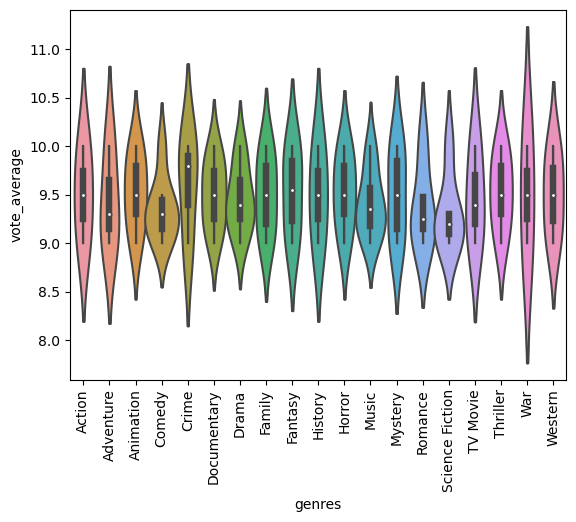

In [224]:
ax = sns.violinplot(x = 'genres', y = 'vote_average',data = officialtable6)
ax.tick_params(axis='x', labelrotation = 90)

sns.violinplot(x=officialtable6["genres"], y=officialtable6["vote_average"], linewidth=1)
sns.violinplot(x=officialtable6["genres"], y=officialtable6["vote_average"], width=1.3)

plt.show()

# Analysis for set data 1

After inputing the data we are able to derive that the most favored genres are comedy, drama, action, and horror. All genres that A24 has succeeded in creating box office hits and achieve critical aclaim

# Set Data 2 Box office

In [60]:
bo = pd.read_csv(r'/Users/jonathanflores/Documents/Flatiron/Gitted_project/zippedData/tn.movie_budgets.csv')
bo

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


For this data set our aim was to find if we can compare the box office succes with A24's succes. Eventualy we got to the conlusion that it is infact comparable and even competative. 

In [61]:
bo['production_budget'] =bo['production_budget'].apply(lambda x: x.replace('$',' '))
bo['domestic_gross'] =bo['domestic_gross'].apply(lambda x: x.replace('$',' '))
bo['worldwide_gross'] =bo['worldwide_gross'].apply(lambda x: x.replace('$',' '))
bo['production_budget'] =bo['production_budget'].apply(lambda x: x.replace(',',' '))
bo['domestic_gross'] =bo['domestic_gross'].apply(lambda x: x.replace(',',' '))
bo['worldwide_gross'] =bo['worldwide_gross'].apply(lambda x: x.replace(',',' '))
bo

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425 000 000,760 507 625,2 776 345 279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410 600 000,241 063 875,1 045 663 875
2,3,"Jun 7, 2019",Dark Phoenix,350 000 000,42 762 350,149 762 350
3,4,"May 1, 2015",Avengers: Age of Ultron,330 600 000,459 005 868,1 403 013 963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317 000 000,620 181 382,1 316 721 747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7 000,0,0
5778,79,"Apr 2, 1999",Following,6 000,48 482,240 495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5 000,1 338,1 338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1 400,0,0


We had to clean up the data first to derive anything from it

In [62]:
bo['budget']= bo['production_budget'].str.replace(' ', '')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget
0,1,"Dec 18, 2009",Avatar,425 000 000,760 507 625,2 776 345 279,425000000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410 600 000,241 063 875,1 045 663 875,410600000
2,3,"Jun 7, 2019",Dark Phoenix,350 000 000,42 762 350,149 762 350,350000000
3,4,"May 1, 2015",Avengers: Age of Ultron,330 600 000,459 005 868,1 403 013 963,330600000
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317 000 000,620 181 382,1 316 721 747,317000000
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7 000,0,0,7000
5778,79,"Apr 2, 1999",Following,6 000,48 482,240 495,6000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5 000,1 338,1 338,5000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1 400,0,0,1400


In [94]:
bo['Domesticgross']=bo['domestic_gross'].str.replace(' ', '')
bo['WorldWidegross']=bo['worldwide_gross'].str.replace(' ', '')


In [97]:
bo.drop(['production_budget', 'domestic_gross'], axis=1)

,id,release_date,movie,worldwide_gross,budget,Domesticgross,WorldWidegross
0,1,"Dec 18, 2009",Avatar,2 776 345 279,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,1 045 663 875,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,149 762 350,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,1 403 013 963,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,1 316 721 747,317000000,620181382,1316721747
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,0,7000,0,0
5778,79,"Apr 2, 1999",Following,240 495,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,1 338,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,0,1400,0,0


In [99]:
bo["budget"] = pd.to_numeric(bo2["budget"], downcast="float")

In [100]:
bo["WorldWidegross"] = pd.to_numeric(bo["WorldWidegross"], downcast="float")

In [101]:
bo.dtypes

id                     int64
release_date          object
movie                 object
production_budget     object
domestic_gross        object
worldwide_gross       object
budget               float64
Domesticgross         object
WorldWidegross       float64
dtype: object

In [103]:
bo["ProfitMargin"] = bo["WorldWidegross"]/bo["budget"]
bo

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget,Domesticgross,WorldWidegross,ProfitMargin
0,1,"Dec 18, 2009",Avatar,425 000 000,760 507 625,2 776 345 279,425000000.0,760507625,2.776345e+09,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410 600 000,241 063 875,1 045 663 875,410600000.0,241063875,1.045664e+09,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,350 000 000,42 762 350,149 762 350,350000000.0,42762350,1.497624e+08,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,330 600 000,459 005 868,1 403 013 963,330600000.0,459005868,1.403014e+09,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317 000 000,620 181 382,1 316 721 747,317000000.0,620181382,1.316722e+09,4.153696
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7 000,0,0,7000.0,0,0.000000e+00,0.000000
5778,79,"Apr 2, 1999",Following,6 000,48 482,240 495,6000.0,48482,2.404950e+05,40.082500
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5 000,1 338,1 338,5000.0,1338,1.338000e+03,0.267600
5780,81,"Sep 29, 2015",A Plague So Pleasant,1 400,0,0,1400.0,0,0.000000e+00,0.000000


In [104]:
bo['ProfitMargin'] = bo['ProfitMargin'].apply(lambda x: x*100)

In [108]:
bo.sort_values(['budget','WorldWidegross'], ascending=[False,False])


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget,Domesticgross,WorldWidegross,ProfitMargin
0,1,"Dec 18, 2009",Avatar,425 000 000,760 507 625,2 776 345 279,425000000.0,760507625,2.776345e+09,653.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410 600 000,241 063 875,1 045 663 875,410600000.0,241063875,1.045664e+09,254.667286
2,3,"Jun 7, 2019",Dark Phoenix,350 000 000,42 762 350,149 762 350,350000000.0,42762350,1.497624e+08,42.789243
3,4,"May 1, 2015",Avengers: Age of Ultron,330 600 000,459 005 868,1 403 013 963,330600000.0,459005868,1.403014e+09,424.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317 000 000,620 181 382,1 316 721 747,317000000.0,620181382,1.316722e+09,415.369636
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7 000,0,0,7000.0,0,0.000000e+00,0.000000
5778,79,"Apr 2, 1999",Following,6 000,48 482,240 495,6000.0,48482,2.404950e+05,4008.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5 000,1 338,1 338,5000.0,1338,1.338000e+03,26.760000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1 400,0,0,1400.0,0,0.000000e+00,0.000000


In [109]:
bo1=bo.head(16)

In [110]:
bo1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget,Domesticgross,WorldWidegross,ProfitMargin
0,1,"Dec 18, 2009",Avatar,425 000 000,760 507 625,2 776 345 279,425000000.0,760507625,2.776345e+09,653.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410 600 000,241 063 875,1 045 663 875,410600000.0,241063875,1.045664e+09,254.667286
2,3,"Jun 7, 2019",Dark Phoenix,350 000 000,42 762 350,149 762 350,350000000.0,42762350,1.497624e+08,42.789243
3,4,"May 1, 2015",Avengers: Age of Ultron,330 600 000,459 005 868,1 403 013 963,330600000.0,459005868,1.403014e+09,424.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317 000 000,620 181 382,1 316 721 747,317000000.0,620181382,1.316722e+09,415.369636
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306 000 000,936 662 225,2 053 311 220,306000000.0,936662225,2.053311e+09,671.016739
6,7,"Apr 27, 2018",Avengers: Infinity War,300 000 000,678 815 482,2 048 134 200,300000000.0,678815482,2.048134e+09,682.711400
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300 000 000,309 420 425,963 420 425,300000000.0,309420425,9.634204e+08,321.140142
8,9,"Nov 17, 2017",Justice League,300 000 000,229 024 295,655 945 209,300000000.0,229024295,6.559452e+08,218.648403
9,10,"Nov 6, 2015",Spectre,300 000 000,200 074 175,879 620 923,300000000.0,200074175,8.796209e+08,293.206974


# Analysis for data set 2

/Users/jonathanflores/anaconda3/envs/datazone/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128 (\x80) missing from current font.
  func(*args, **kwargs)
/Users/jonathanflores/anaconda3/envs/datazone/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 153 (\x99) missing from current font.
  func(*args, **kwargs)
/Users/jonathanflores/anaconda3/envs/datazone/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jonathanflores/anaconda3/envs/datazone/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


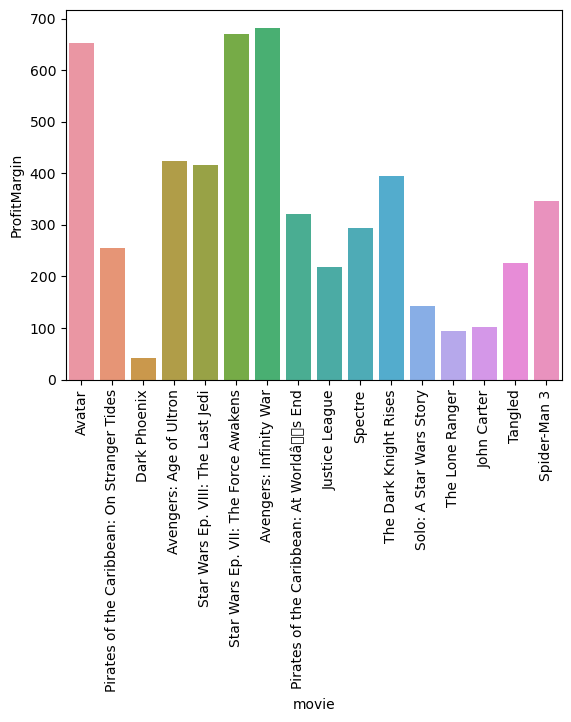

In [112]:
ax=sns.barplot(data=bo1, x="movie", y="ProfitMargin")
ax.tick_params(axis='x', labelrotation = 90)


Here we can see that the top grossing movies of all time are mostly franchises and rarely contain any orignal movies. To replicate this process, it would take a huge amount of luck and money, one that microsoft cannot count on (luck). So if we cannot replicate this proccess, what can microsoft do to achieve success quickly. Abosrb a studio that has replicated this box office success with a low budget and has critical acclaim. Studio A24

In [113]:
A24 = pd.read_csv(r'/Users/jonathanflores/Documents/Flatiron/Official project/Official-Project-1/A24.csv')
A24

,Unnamed: 0,title,Directed by,Written by,Produced by,Starring,Cinematography,Edited by,Music by,Production companies,...,Language,Running time (int),Budget (float),Box office (float),Release dates (datetime),imdb,metascore,rotten_tomatoes,Screenplay by,Based on
0,0,A Glimpse Inside the Mind of Charles Swan III,Roman Coppola,Roman Coppola,"['Roman Coppola', 'Youree Henley']","['Charlie Sheen', 'Katheryn Winnick', 'Bill Mu...",Nick Beal,Robert Schafer,"['Liam Hayes', 'Roger Neill']","['American Zoetrope', 'The Directors Bureau']",...,English,86.0,NaN,210565.0,2012-11-15,4.6,28.0,16%,NaN,NaN
1,1,Ginger & Rosa,Sally Potter,Sally Potter,"['Christopher Sheppard', 'Andrew Litvin']","['Elle Fanning', 'Alice Englert', 'Alessandro ...",Robbie Ryan,Anders Refn,NaN,"['British Film Institute', 'BBC Films', 'Adven...",...,English,90.0,NaN,1700000.0,2012-09-07,6.2,69.0,78%,NaN,NaN
2,2,Spring Breakers,Harmony Korine,Harmony Korine,"['Chris Hanley', 'Jordan Gertner', 'David Zand...","['James Franco', 'Selena Gomez', 'Vanessa Hudg...",Benoît Debie,Douglas Crise,"['Skrillex', 'Cliff Martinez']","['Muse Productions', 'Annapurna Pictures', 'Di...",...,English,94.0,5000000.0,31700000.0,2012-09-04,5.3,63.0,67%,NaN,NaN
3,3,The Bling Ring,Sofia Coppola,NaN,"['Roman Coppola', 'Sofia Coppola', 'Youree Hen...","['Israel Broussard', 'Katie Chang', 'Taissa Fa...","['Harris Savides', 'Christopher Blauvelt']",Sarah Flack,"['Brian Reitzell', 'Daniel Lopatin']","['American Zoetrope', 'NALA Films', 'Pathé Dis...",...,English,90.0,8200000.0,20000000.0,2013-05-16,5.6,66.0,60%,Sofia Coppola,"['""The Suspects Wore Louboutins""', 'by', 'Nanc..."
4,4,The Spectacular Now,James Ponsoldt,NaN,"['Tom McNulty', 'Shawn Levy', 'Michelle Krumm'...","['Miles Teller', 'Shailene Woodley', 'Brie Lar...",Jess Hall,Darrin Navarro,Rob Simonsen,"['Andrew Lauren Productions', '21 Laps Enterta...",...,English,95.0,2500000.0,6900000.0,2013-01-18,7.1,82.0,91%,"['Scott Neustadter', 'Michael H. Weber']","['The Spectacular Now', 'by Tim Tharp']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,147,Dream Scenario,Kristoffer Borgli,Kristoffer Borgli,"['Ari Aster', 'Lars Knudsen', 'Jacob Jaffke', ...","['Nicolas Cage', 'Michael Cera', 'Julianne Nic...",Benjamin Loeb,NaN,NaN,"['A24', 'Square Peg']",...,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,148,I Saw the TV Glow,Jane Schoenbrun,Jane Schoenbrun,"['Emma Stone', 'Dave McCary', 'Ali Herting', '...","['Justice Smith', 'Brigette Lundy-Paine', 'Dan...",Eric K. Yue,Sofi Marshall,NaN,"['A24', 'Smudge Films', 'Fruit Tree']",...,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,149,The Iron Claw,Sean Durkin,NaN,"['Tessa Ross', 'Derrin Schlesinger', 'Juliette...","['Zac Efron', 'Lily James', 'Harris Dickinson'...",Mátyás Erdély,Matthew Hannam,NaN,"['A24', 'BBC Film', 'House Productions', 'Acce...",...,English,NaN,NaN,NaN,NaN,6.6,NaN,NaN,Sean Durkin,NaN
150,150,Priscilla,Sofia Coppola,NaN,"['Sofia Coppola', 'Youree Henley', 'Lorenzo Mi...","['Cailee Spaeny', 'Jacob Elordi']",Philippe Le Sourd,Sarah Flack,NaN,"['Stage 6 Films', 'The Apartment Pictures', 'A...",...,English,NaN,NaN,NaN,NaN,8.4,NaN,NaN,Sofia Coppola,"['Elvis and Me', 'by', 'Priscilla Presley', 'w..."


After some cleaning we can derive that they are comparable and even their directors when left alone to create stories, succeed.

In [114]:
A24.drop(['Produced by', 'Starring', 'Cinematography','Edited by','Music by','Production companies'], axis=1)
A25 = A24

In [115]:
A26= A25.drop(['Release dates (datetime)','rotten_tomatoes','Screenplay by','Based on','Produced by','Starring','Cinematography','Edited by','Music by','Production companies','Language','Running time (int)','Country','Distributed by','Written by','Unnamed: 0'], axis=1)
A26

,title,Directed by,Budget (float),Box office (float),imdb,metascore
0,A Glimpse Inside the Mind of Charles Swan III,Roman Coppola,NaN,210565.0,4.6,28.0
1,Ginger & Rosa,Sally Potter,NaN,1700000.0,6.2,69.0
2,Spring Breakers,Harmony Korine,5000000.0,31700000.0,5.3,63.0
3,The Bling Ring,Sofia Coppola,8200000.0,20000000.0,5.6,66.0
4,The Spectacular Now,James Ponsoldt,2500000.0,6900000.0,7.1,82.0
...,...,...,...,...,...,...
147,Dream Scenario,Kristoffer Borgli,NaN,NaN,NaN,NaN
148,I Saw the TV Glow,Jane Schoenbrun,NaN,NaN,NaN,NaN
149,The Iron Claw,Sean Durkin,NaN,NaN,6.6,NaN
150,Priscilla,Sofia Coppola,NaN,NaN,8.4,NaN


In [116]:
A26["ProfitMargin"] = A26["Box office (float)"]/A26["Budget (float)"]
A26

,title,Directed by,Budget (float),Box office (float),imdb,metascore,ProfitMargin
0,A Glimpse Inside the Mind of Charles Swan III,Roman Coppola,NaN,210565.0,4.6,28.0,NaN
1,Ginger & Rosa,Sally Potter,NaN,1700000.0,6.2,69.0,NaN
2,Spring Breakers,Harmony Korine,5000000.0,31700000.0,5.3,63.0,6.340000
3,The Bling Ring,Sofia Coppola,8200000.0,20000000.0,5.6,66.0,2.439024
4,The Spectacular Now,James Ponsoldt,2500000.0,6900000.0,7.1,82.0,2.760000
...,...,...,...,...,...,...,...
147,Dream Scenario,Kristoffer Borgli,NaN,NaN,NaN,NaN,NaN
148,I Saw the TV Glow,Jane Schoenbrun,NaN,NaN,NaN,NaN,NaN
149,The Iron Claw,Sean Durkin,NaN,NaN,6.6,NaN,NaN
150,Priscilla,Sofia Coppola,NaN,NaN,8.4,NaN,NaN


In [117]:
A26['ProfitMargin'] = A26['ProfitMargin'].apply(lambda x: x*100)
A26

,title,Directed by,Budget (float),Box office (float),imdb,metascore,ProfitMargin
0,A Glimpse Inside the Mind of Charles Swan III,Roman Coppola,NaN,210565.0,4.6,28.0,NaN
1,Ginger & Rosa,Sally Potter,NaN,1700000.0,6.2,69.0,NaN
2,Spring Breakers,Harmony Korine,5000000.0,31700000.0,5.3,63.0,634.000000
3,The Bling Ring,Sofia Coppola,8200000.0,20000000.0,5.6,66.0,243.902439
4,The Spectacular Now,James Ponsoldt,2500000.0,6900000.0,7.1,82.0,276.000000
...,...,...,...,...,...,...,...
147,Dream Scenario,Kristoffer Borgli,NaN,NaN,NaN,NaN,NaN
148,I Saw the TV Glow,Jane Schoenbrun,NaN,NaN,NaN,NaN,NaN
149,The Iron Claw,Sean Durkin,NaN,NaN,6.6,NaN,NaN
150,Priscilla,Sofia Coppola,NaN,NaN,8.4,NaN,NaN


In [118]:
A26.sort_values(['ProfitMargin'], ascending=False)

,title,Directed by,Budget (float),Box office (float),imdb,metascore,ProfitMargin
41,Moonlight,Barry Jenkins,1500000.0,65300000.0,7.4,99.0,4353.333333
51,A Ghost Story,David Lowery,100000.0,2000000.0,6.8,84.0,2000.000000
122,X,Ti West,1000000.0,15100000.0,6.6,79.0,1510.000000
114,X,Ti West,1000000.0,15100000.0,6.6,79.0,1510.000000
28,The Witch,Robert Eggers,4000000.0,40400000.0,6.9,83.0,1010.000000
...,...,...,...,...,...,...,...
147,Dream Scenario,Kristoffer Borgli,NaN,NaN,NaN,NaN,NaN
148,I Saw the TV Glow,Jane Schoenbrun,NaN,NaN,NaN,NaN,NaN
149,The Iron Claw,Sean Durkin,NaN,NaN,6.6,NaN,NaN
150,Priscilla,Sofia Coppola,NaN,NaN,8.4,NaN,NaN


In [119]:
A27 = A26.dropna()

In [120]:
A28 = A27.sort_values(['ProfitMargin'], ascending=False)
A28.head(25)

,title,Directed by,Budget (float),Box office (float),imdb,metascore,ProfitMargin
41,Moonlight,Barry Jenkins,1500000.0,65300000.0,7.4,99.0,4353.333333
51,A Ghost Story,David Lowery,100000.0,2000000.0,6.8,84.0,2000.000000
122,X,Ti West,1000000.0,15100000.0,6.6,79.0,1510.000000
114,X,Ti West,1000000.0,15100000.0,6.6,79.0,1510.000000
28,The Witch,Robert Eggers,4000000.0,40400000.0,6.9,83.0,1010.000000
121,Pearl,Ti West,1000000.0,9400000.0,7.0,73.0,940.000000
50,It Comes at Night,Trey Edward Shults,2400000.0,20000000.0,6.2,78.0,833.333333
67,Hereditary,Ari Aster,10000000.0,82500000.0,7.3,87.0,825.000000
57,Lady Bird,Greta Gerwig,10000000.0,79000000.0,7.4,93.0,790.000000
101,Minari,Lee Isaac Chung,2000000.0,15500000.0,7.4,89.0,775.000000


In [121]:
A29=A28.drop(114)
A29

,title,Directed by,Budget (float),Box office (float),imdb,metascore,ProfitMargin
41,Moonlight,Barry Jenkins,1500000.0,65300000.0,7.4,99.0,4353.333333
51,A Ghost Story,David Lowery,100000.0,2000000.0,6.8,84.0,2000.000000
122,X,Ti West,1000000.0,15100000.0,6.6,79.0,1510.000000
28,The Witch,Robert Eggers,4000000.0,40400000.0,6.9,83.0,1010.000000
121,Pearl,Ti West,1000000.0,9400000.0,7.0,73.0,940.000000
...,...,...,...,...,...,...,...
68,Woman Walks Ahead,Susanna White,5000000.0,80912.0,6.6,51.0,1.618240
54,Woodshock,"['Kate Mulleavy', 'Laura Mulleavy']",5000000.0,43682.0,4.2,39.0,0.873640
60,The Ballad of Lefty Brown,Jared Moshe,5000000.0,7856.0,6.3,64.0,0.157120
129,White Noise,Noah Baumbach,100000000.0,34818.0,5.5,30.0,0.034818


In [122]:
A30=A29.head(11)
A30

,title,Directed by,Budget (float),Box office (float),imdb,metascore,ProfitMargin
41,Moonlight,Barry Jenkins,1500000.0,65300000.0,7.4,99.0,4353.333333
51,A Ghost Story,David Lowery,100000.0,2000000.0,6.8,84.0,2000.000000
122,X,Ti West,1000000.0,15100000.0,6.6,79.0,1510.000000
28,The Witch,Robert Eggers,4000000.0,40400000.0,6.9,83.0,1010.000000
121,Pearl,Ti West,1000000.0,9400000.0,7.0,73.0,940.000000
50,It Comes at Night,Trey Edward Shults,2400000.0,20000000.0,6.2,78.0,833.333333
67,Hereditary,Ari Aster,10000000.0,82500000.0,7.3,87.0,825.000000
57,Lady Bird,Greta Gerwig,10000000.0,79000000.0,7.4,93.0,790.000000
101,Minari,Lee Isaac Chung,2000000.0,15500000.0,7.4,89.0,775.000000
86,The Farewell,Lulu Wang,3000000.0,23100000.0,7.5,89.0,770.000000


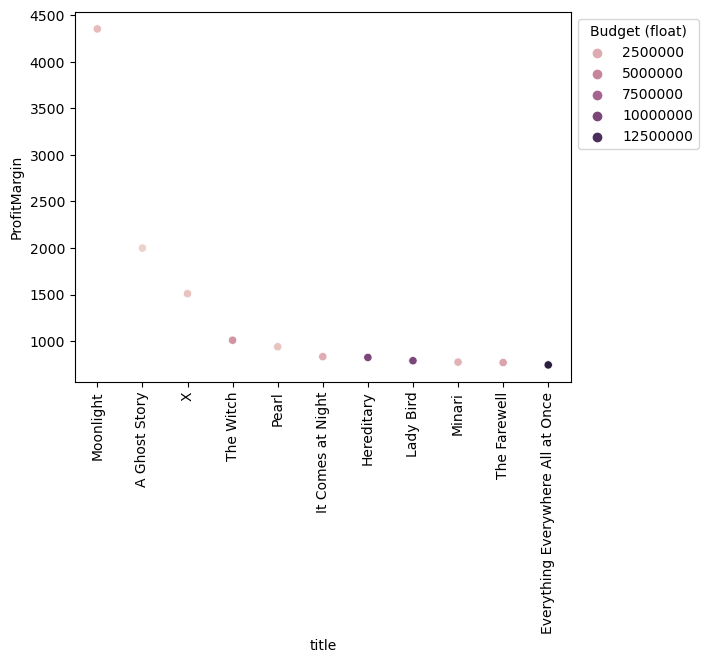

In [123]:
ax = sns.scatterplot(x = 'title', y = 'ProfitMargin',hue = 'Budget (float)', data = A30)
ax.tick_params(axis='x', labelrotation = 90)
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
sns.color_palette("magma", as_cmap=True)
plt.show()

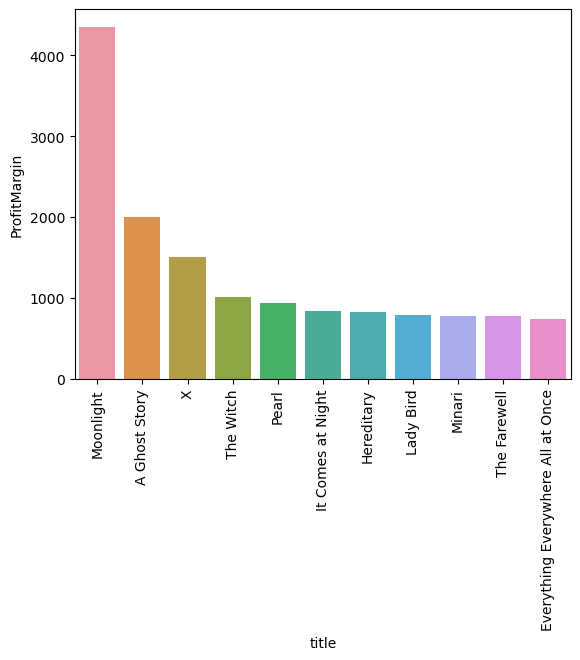

In [124]:
ax=sns.barplot(data=A30, x="title", y="ProfitMargin")
ax.tick_params(axis='x', labelrotation = 90)


# Final Analysis and Conclusion

After the final data set we have found that A24 are a viable solution to microsoft's problem of what to do when entering the film industry. By simply absorbing A24 you absorb its movie strategy, huge critically acclaimed library and trust in the film makers.